<a href="https://colab.research.google.com/github/kingattai/ml-lime-shap-disease-prediction/blob/main/The_MLP_Supervised.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install lime

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 275.7/275.7 kB 10.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for lime: filename=lime-0.2.0.1-py3-none-any.whl size=283834 sha256=f7fa9de1acd32dff4cd141d86b9625967eea0a013129992d96883e61632b875c
  Stored in directory: /root/.cache/pip/wheels/85/fa/a3/9c2d44c9f3cd77cf4e533b58900b2bf4487f2a17e8ec212a3d
Successfully built lime


In [ ]:
pip install shap

In [ ]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report, accuracy_score, roc_auc_score
from sklearn.neural_network import MLPClassifier
import pandas as pd
from google.colab import drive
import numpy as np
import lime.lime_tabular
import shap
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
# Mount Google Drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Load the dataset
df = pd.read_csv('/content/drive/My Drive/Colab Notebooks/NFRF ML/FD6D.csv')
df

,Unnamed: 0,ABDPN,BITAIM,BLDYURN,CTRH,CHSIND,CHSPN,CHLNRIG,CNST,CGHDRY,...,SPPBPN,URNFQC,VMT,WHZ,MAL,ENFVR,HVAD,UTI,RTI,TB
0,0,4,4,1,3,3,4,4,3,2,...,2,1,4,4,1,1,0,1,1,0
1,1,2,2,1,3,1,1,2,1,2,...,1,1,2,1,1,0,0,0,1,0
2,2,1,3,1,2,1,2,5,3,1,...,1,1,1,1,0,1,0,0,0,0
3,3,3,3,2,3,1,3,1,1,2,...,4,4,4,1,1,0,1,1,1,0
4,4,3,1,4,1,3,1,1,1,1,...,4,3,3,1,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3909,3909,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,0,0,0,0,0
3910,3910,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,0,0,0,0,0
3911,3911,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,0,0,0,0,0
3912,3912,1,1,1,1,1,1,1,1,1,...,1,1,1,1,0,0,1,0,0,0


In [ ]:
#Using DataFrame.drop() method.
df2=df.drop(df.columns[0], axis=1)
df2

,ABDPN,BITAIM,BLDYURN,CTRH,CHSIND,CHSPN,CHLNRIG,CNST,CGHDRY,DIFBRT,...,SPPBPN,URNFQC,VMT,WHZ,MAL,ENFVR,HVAD,UTI,RTI,TB
0,4,4,1,3,3,4,4,3,2,3,...,2,1,4,4,1,1,0,1,1,0
1,2,2,1,3,1,1,2,1,2,1,...,1,1,2,1,1,0,0,0,1,0
2,1,3,1,2,1,2,5,3,1,1,...,1,1,1,1,0,1,0,0,0,0
3,3,3,2,3,1,3,1,1,2,1,...,4,4,4,1,1,0,1,1,1,0
4,3,1,4,1,3,1,1,1,1,1,...,4,3,3,1,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3909,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,0,0,0,0,0
3910,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,0,0,0,0,0
3911,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,0,0,0,0,0
3912,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,0,0,1,0,0,0


In [ ]:
X = df2.iloc[:, :32].values
X

array([[4, 4, 1, ..., 1, 4, 4],
       [2, 2, 1, ..., 1, 2, 1],
       [1, 3, 1, ..., 1, 1, 1],
       ...,
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1]])

In [ ]:
Y = df2.iloc[:, 32:].values
Y

array([[1, 1, 0, 1, 1, 0],
       [1, 0, 0, 0, 1, 0],
       [0, 1, 0, 0, 0, 0],
       ...,
       [1, 0, 0, 0, 0, 0],
       [0, 0, 1, 0, 0, 0],
       [1, 0, 0, 0, 0, 0]])

In [ ]:
# Function to evaluate classifiers
def evaluate(y_true, y_pred):
    print("Performance Evaluation:")
    print(classification_report(y_true, y_pred))
    print("Accuracy:", accuracy_score(y_true, y_pred))
    auc_score = roc_auc_score(y_true, y_pred, average='macro')
    print("AUC-ROC:", auc_score)

In [ ]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [ ]:
# Define MLP classifier
mlp = MLPClassifier()

In [ ]:
# Define parameter grids for grid search
param_grid_mlp = {
    'hidden_layer_sizes': [(100,), (50, 50), (50, 25, 10)],  # Example configurations for hidden layers
    'activation': ['relu', 'tanh', 'logistic'],  # Activation functions
    'alpha': [0.0001, 0.001, 0.01],  # L2 penalty (regularization term) parameter
}

In [ ]:
# Perform grid search for MLP classifier
mlp_grid = GridSearchCV(mlp, param_grid_mlp, cv=3, scoring='accuracy')

In [ ]:
# Fit the MLP classifier to the training data
mlp_grid.fit(X_train, y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptro

GridSearchCV(cv=3, estimator=MLPClassifier(),
             param_grid={'activation': ['relu', 'tanh', 'logistic'],
                         'alpha': [0.0001, 0.001, 0.01],
                         'hidden_layer_sizes': [(100,), (50, 50),
                                                (50, 25, 10)]},
             scoring='accuracy')

In [ ]:
# Make predictions on the test data using the best estimator found by grid search
mlp_pred = mlp_grid.best_estimator_.predict(X_test)

In [ ]:
# Print evaluation metrics for the test data
print("Performance Evaluation for Test Dataset:")
evaluate(y_test, mlp_pred)

Performance Evaluation for Test Dataset:
Performance Evaluation:
              precision    recall  f1-score   support

           0       0.85      0.89      0.87       536
           1       0.65      0.47      0.54       230
           2       0.71      0.30      0.42        98
           3       0.77      0.63      0.70       175
           4       0.76      0.65      0.70       229
           5       0.75      0.57      0.65        82

   micro avg       0.78      0.68      0.73      1350
   macro avg       0.75      0.58      0.64      1350
weighted avg       0.77      0.68      0.72      1350
 samples avg       0.72      0.65      0.65      1350

Accuracy: 0.44699872286079184
AUC-ROC: 0.7397824017777497


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in samples with no true labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in samples with no true nor predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
# Make predictions on the training data using the best estimator found by grid search
mlp_train_pred = mlp_grid.best_estimator_.predict(X_train)

In [ ]:
# Print evaluation metrics for the training data
print("Performance Evaluation for Training Dataset:")
evaluate(y_train, mlp_train_pred)

Performance Evaluation for Training Dataset:
Performance Evaluation:
              precision    recall  f1-score   support

           0       0.88      0.91      0.90      2183
           1       0.73      0.54      0.62       927
           2       0.84      0.42      0.56       326
           3       0.85      0.67      0.75       732
           4       0.79      0.74      0.76       865
           5       0.87      0.59      0.70       299

   micro avg       0.84      0.74      0.78      5332
   macro avg       0.83      0.64      0.72      5332
weighted avg       0.83      0.74      0.78      5332
 samples avg       0.75      0.69      0.69      5332

Accuracy: 0.5170871925902267
AUC-ROC: 0.7809123419932219


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in samples with no true labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in samples with no true nor predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


/usr/local/lib/python3.11/dist-packages/lime/lime_tabular.py:372: UserWarning: 
                    Prediction probabilties do not sum to 1, and
                    thus does not constitute a probability space.
                    Check that you classifier outputs probabilities
                    (Not log probabilities, or actual class predictions).
                    
  warnings.warn("""
<ipython-input-19-5f175502dfed>:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=importance_df, palette='viridis')


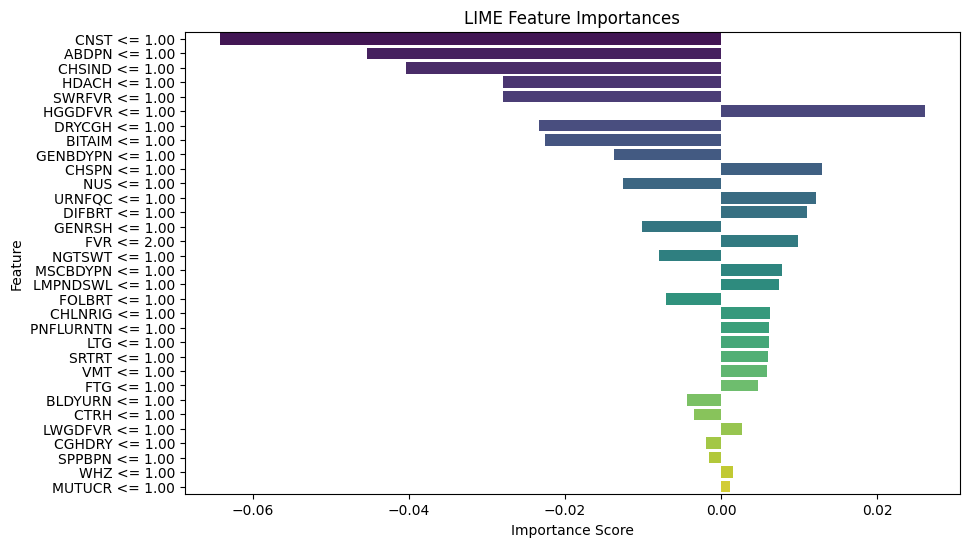

In [ ]:
# LIME explanation plot
explainer = lime.lime_tabular.LimeTabularExplainer(
    X_train,
    feature_names=df2.columns[:32],
    class_names=['MAL', 'ENFVR', 'HVAD', 'UTI', 'RTI', 'TB'],
    discretize_continuous=True
)

# Select a random instance
i = np.random.randint(0, X_test.shape[0])

# Create a wrapper function for predict_proba to handle a single output
def predict_proba_wrapper_single_output(x):
    predictions = mlp_grid.best_estimator_.predict_proba(x)
    return predictions

exp = explainer.explain_instance(X_test[i], predict_proba_wrapper_single_output, num_features=32)

# Extract feature importances for the selected instance
importance_df = pd.DataFrame(exp.as_list(), columns=['Feature', 'Importance'])

# Plot LIME explanation
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=importance_df, palette='viridis')
plt.title('LIME Feature Importances')
plt.xlabel('Importance Score')
plt.ylabel('Feature')
plt.show()

  0%|          | 0/783 [00:00<?, ?it/s]

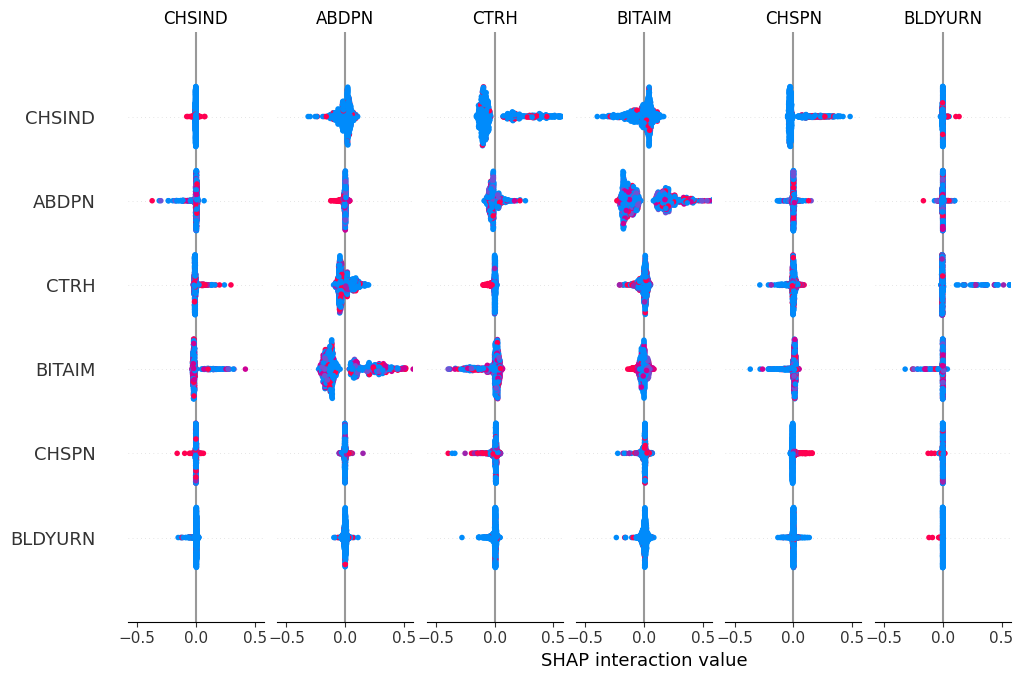

In [ ]:
# Convert X_test to DataFrame with column names
X_test_df = pd.DataFrame(X_test, columns=df2.columns[:32])

# SHAP explainer using KernelExplainer with kmeans summarization for background
background = shap.kmeans(X_train, 10)  # Summarize X_train using 100 samples

explainer = shap.KernelExplainer(mlp_grid.best_estimator_.predict_proba, background)

# Compute SHAP values (may take longer for MLP)
shap_values = explainer.shap_values(X_test_df)

# Plot SHAP summary plot
shap.summary_plot(shap_values, X_test_df, feature_names=df2.columns[:32])

In [ ]:
# Save the training and testing sets as CSV
# Convert training sets to DataFrame
train_df = pd.concat([pd.DataFrame(X_train), pd.DataFrame(y_train)], axis=1)
test_df = pd.concat([pd.DataFrame(X_test), pd.DataFrame(y_test)], axis=1)

In [ ]:
# Save DataFrames to CSV
train_df.to_csv('MLP_FD6D_train_set.csv', index=False)

In [ ]:
# Save DataFrames to CSV
test_df.to_csv('MLP_FD6D_test_set.csv', index=False)